# Introduction
- identify ranges, outliers, trends, patterns, missing values (imputative, drop), categorization (for ML), encoding
- consider combining some features if they show similar trends as the target variable. Could be revealed using feature ranking too.

### Imports
Import libraries and write settings here.

In [312]:
import matplotlib 
# Specify renderer
# matplotlib.use('Agg')

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Boiler-plate settings for producing pub-quality figures
# 1 point = 1/72 inch
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
matplotlib.rcParams.update({'figure.figsize': (8, 5)    # inches
                            , 'font.size': 22      # points
                            , 'legend.fontsize': 16      # points
                            , 'lines.linewidth': 1.5       # points
                            , 'axes.linewidth': 1.5       # points
                            , 'text.usetex': True    # Use LaTeX to layout text
                            , 'font.family': "serif"  # Use serifed fonts
                            , 'xtick.major.size': 10     # length, points
                            , 'xtick.major.width': 1.5     # points
                            , 'xtick.minor.size': 6     # length, points
                            , 'xtick.minor.width': 1     # points
                            , 'ytick.major.size': 10     # length, points
                            , 'ytick.major.width': 1.5     # points
                            , 'ytick.minor.size': 6     # length, points
                            , "xtick.minor.visible": True
                            , "ytick.minor.visible": True
                            , 'font.weight': 'bold'
                            , 'ytick.minor.width': 1     # points
                            , 'font.serif': ("Times", "Palatino", "Computer Modern Roman", "New Century Schoolbook", "Bookman"), 'font.sans-serif': ("Helvetica", "Avant Garde", "Computer Modern Sans serif"), 'font.monospace': ("Courier", "Computer Modern Typewriter"), 'font.cursive': "Zapf Chancery"
                            })


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [313]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.feature_selection import SelectFromModel, VarianceThreshold, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

In [314]:
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [315]:
import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

In [316]:
import sys
import logging
logging.basicConfig(level=logging.INFO, stream=sys.stdout)

%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp

# ML
import sklearn

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

#Set the display format to be scientific for ease of analysis
# pd.options.display.float_format = '{:,.2g}'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
%load_ext watermark
%watermark -v -h -n -g -m -p jupyerlab,numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Wed Jul 01 2020 

CPython 3.7.6
IPython 7.13.0

jupyerlab not installed
numpy 1.18.1
scipy 1.4.1
sklearn 0.22.1
pandas 1.0.3
matplotlib 3.1.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
host name  : C02X61QTJHD5
Git hash   : 243c8326fdf94b6d4feca7bbb6ddb306584e87d4


In [318]:
data = pd.read_csv('../data/raw/cc_info.csv')

In [319]:
data.head()

# CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    C10001    40.900749           0.818182      95.40              0.00   
1    C10002  3202.467416           0.909091       0.00              0.00   
2    C10003  2495.148862           1.000000     773.17            773.17   
3    C10004  1666.670542           0.636364    1499.00           1499.00   
4    C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [320]:
assert len(data) == 8950

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   # CUST_ID                         8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [322]:
# Get number of unique entries in each column
object_nunique = list(map(lambda col: data[col].nunique(), data.columns))
d = dict(zip(data.columns, object_nunique))

# Print number of unique entries by each column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('TENURE', 7),
 ('BALANCE_FREQUENCY', 43),
 ('PURCHASES_FREQUENCY', 47),
 ('ONEOFF_PURCHASES_FREQUENCY', 47),
 ('PURCHASES_INSTALLMENTS_FREQUENCY', 47),
 ('PRC_FULL_PAYMENT', 47),
 ('CASH_ADVANCE_FREQUENCY', 54),
 ('CASH_ADVANCE_TRX', 65),
 ('PURCHASES_TRX', 173),
 ('CREDIT_LIMIT', 205),
 ('ONEOFF_PURCHASES', 4014),
 ('CASH_ADVANCE', 4323),
 ('INSTALLMENTS_PURCHASES', 4452),
 ('PURCHASES', 6203),
 ('MINIMUM_PAYMENTS', 8636),
 ('PAYMENTS', 8711),
 ('BALANCE', 8871),
 ('# CUST_ID', 8950)]

In [323]:
# duplicates? missing values?
data.isna().any()
# imputate value?

# CUST_ID                           False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [324]:
print("Calculate the % of missing values in each row")
data.isna().mean()

Calculate the % of missing values in each row


# CUST_ID                           0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [325]:
df = data
df.drop(columns=['TENURE', 'PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX'], inplace=True)
df.head()

# CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    C10001    40.900749           0.818182      95.40              0.00   
1    C10002  3202.467416           0.909091       0.00              0.00   
2    C10003  2495.148862           1.000000     773.17            773.17   
3    C10004  1666.670542           0.636364    1499.00           1499.00   
4    C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY     PAYMENTS  
0                0.000000   201.802084  
1                0.250000  4103.032597  
2                0.000000   622.066742  
3                0.083333     0.000000  
4                0.000000   678.334763

In [326]:
print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())

Columns with Missing Values:: []


In [327]:
df.columns 

Index(['# CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PAYMENTS'],
      dtype='object')

In [328]:
# rename colnames so I can plot, replace _ w/ nothing
df.columns = df.columns.str.replace("_", "").str.lower()
df.rename(columns={'# custid': 'custid'}, inplace=True)        

In [329]:
df.columns

Index(['custid', 'balance', 'balancefrequency', 'purchases', 'oneoffpurchases',
       'installmentspurchases', 'cashadvance', 'purchasesfrequency',
       'oneoffpurchasesfrequency', 'purchasesinstallmentsfrequency',
       'cashadvancefrequency', 'payments'],
      dtype='object')

        balance  balancefrequency  purchases  oneoffpurchases  \
count   8950.00           8950.00    8950.00          8950.00   
mean    1564.47              0.88    1003.20           592.44   
std     2081.53              0.24    2136.63          1659.89   
min        0.00              0.00       0.00             0.00   
25%      128.28              0.89      39.64             0.00   
50%      873.39              1.00     361.28            38.00   
75%     2054.14              1.00    1110.13           577.41   
max    19043.14              1.00   49039.57         40761.25   

       installmentspurchases  cashadvance  purchasesfrequency  \
count                8950.00      8950.00             8950.00   
mean                  411.07       978.87                0.49   
std                   904.34      2097.16                0.40   
min                     0.00         0.00                0.00   
25%                     0.00         0.00                0.08   
50%                    8

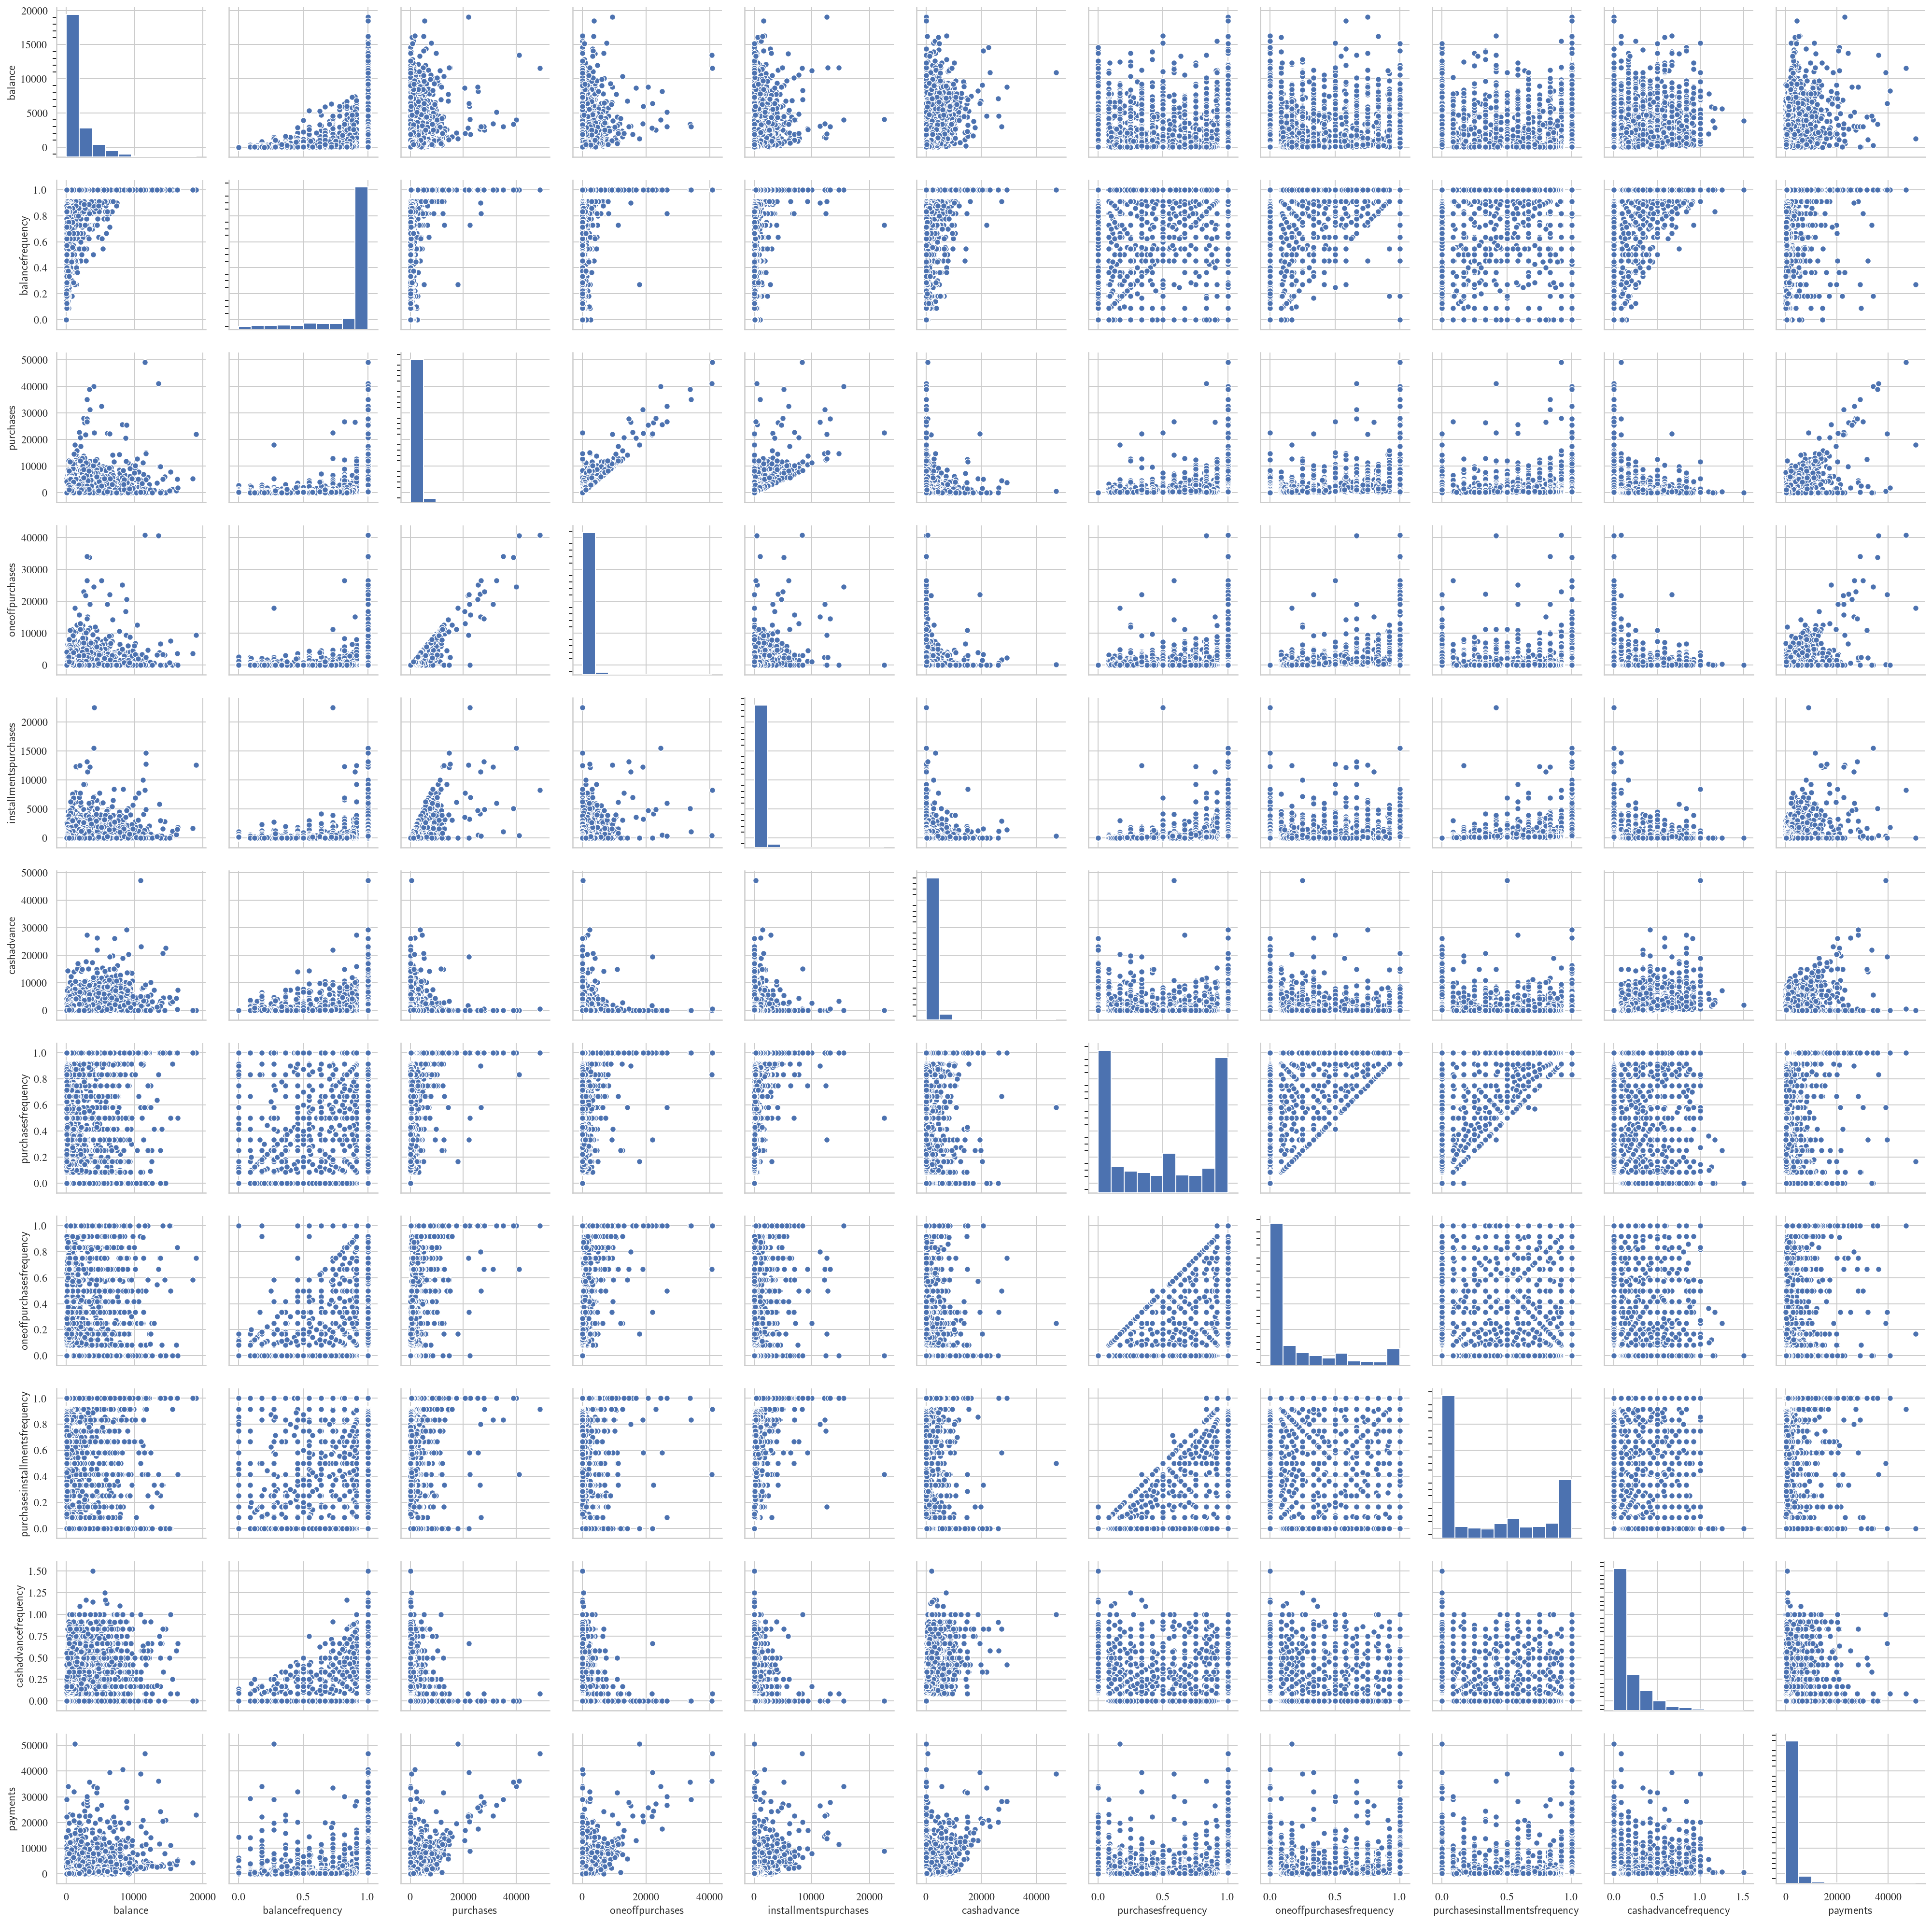

In [330]:
# identify ranges, outliers again
print(df.describe().round(2))

# find outliers, trends, patterns, plot histograms, correlation plots
sns.pairplot(df)
plt.show()



In [331]:
df.drop(df[df['cashadvancefrequency'] > 1].index, inplace=True)

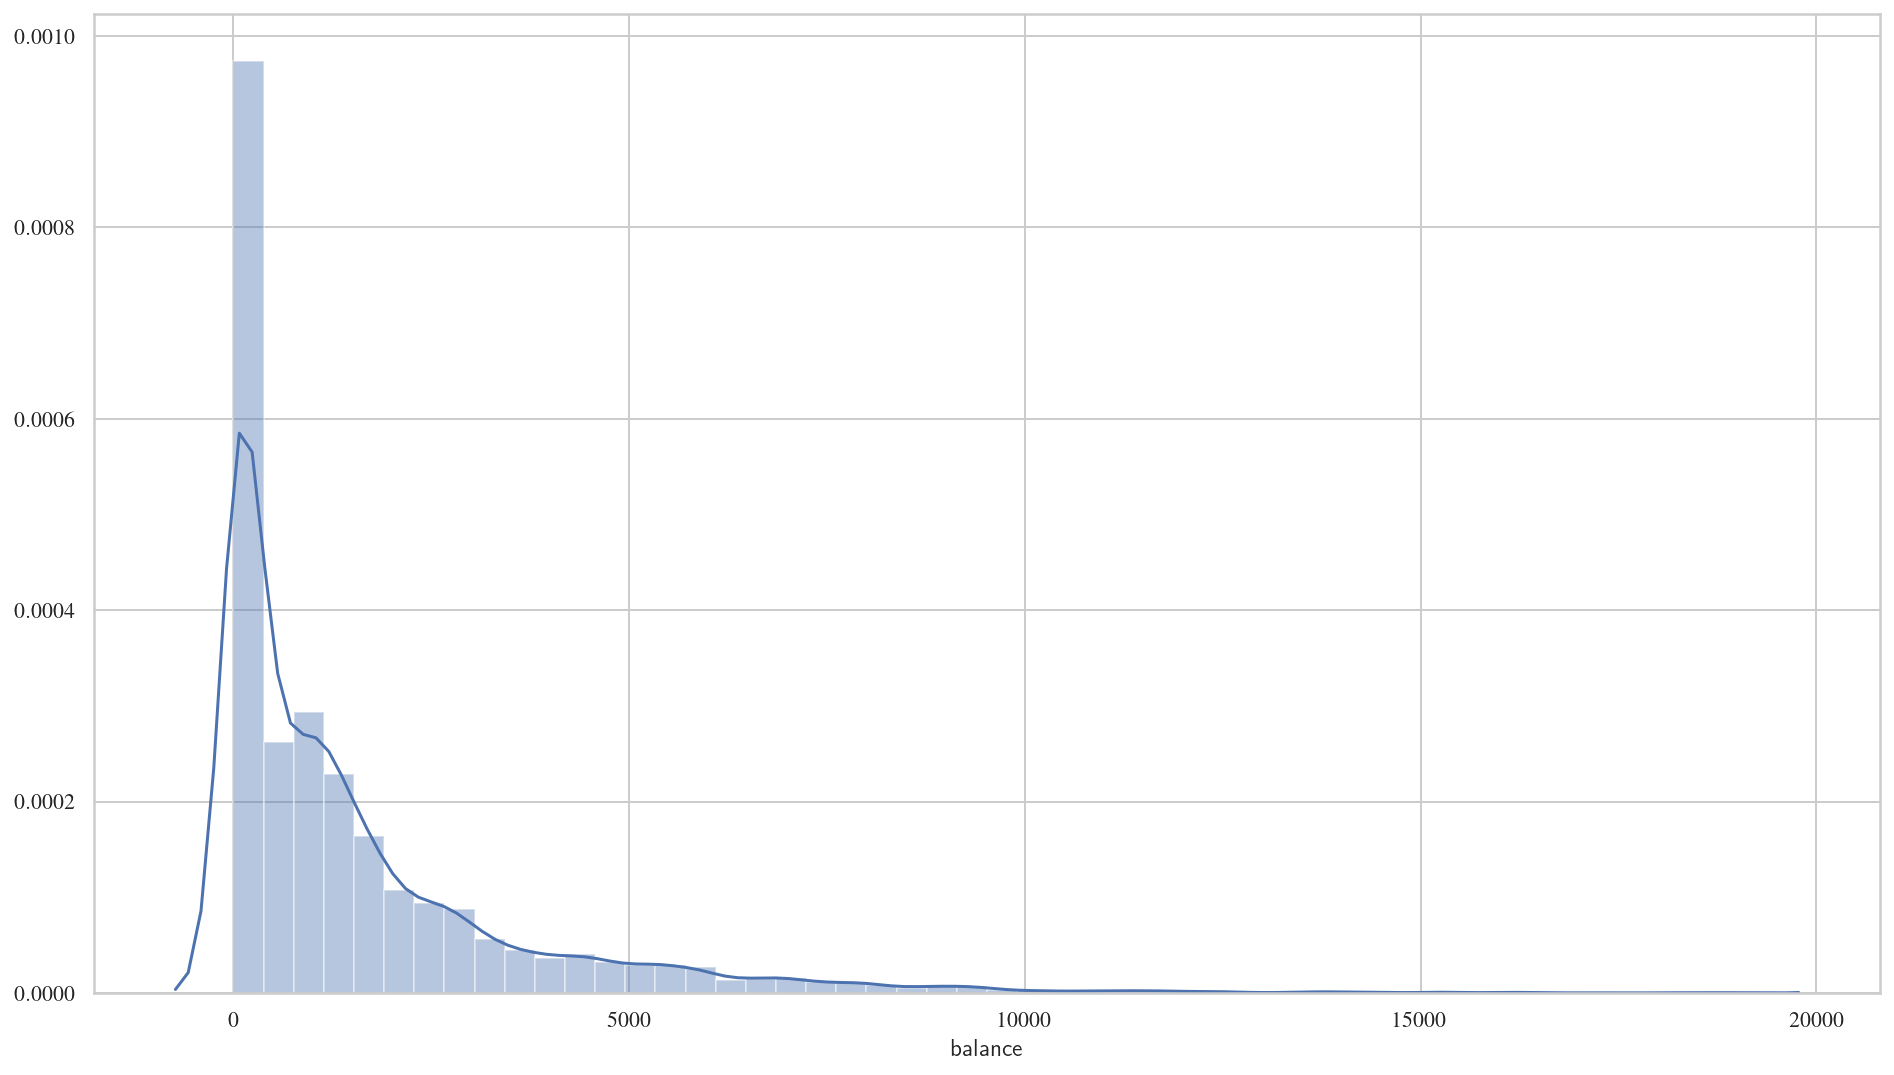

In [293]:
# hist plot
tmp = df.select_dtypes(exclude=['object'])
tmp = tmp.loc[:, tmp.columns != 'custid']

sns.distplot(tmp.iloc[:, 0])
plt.show()


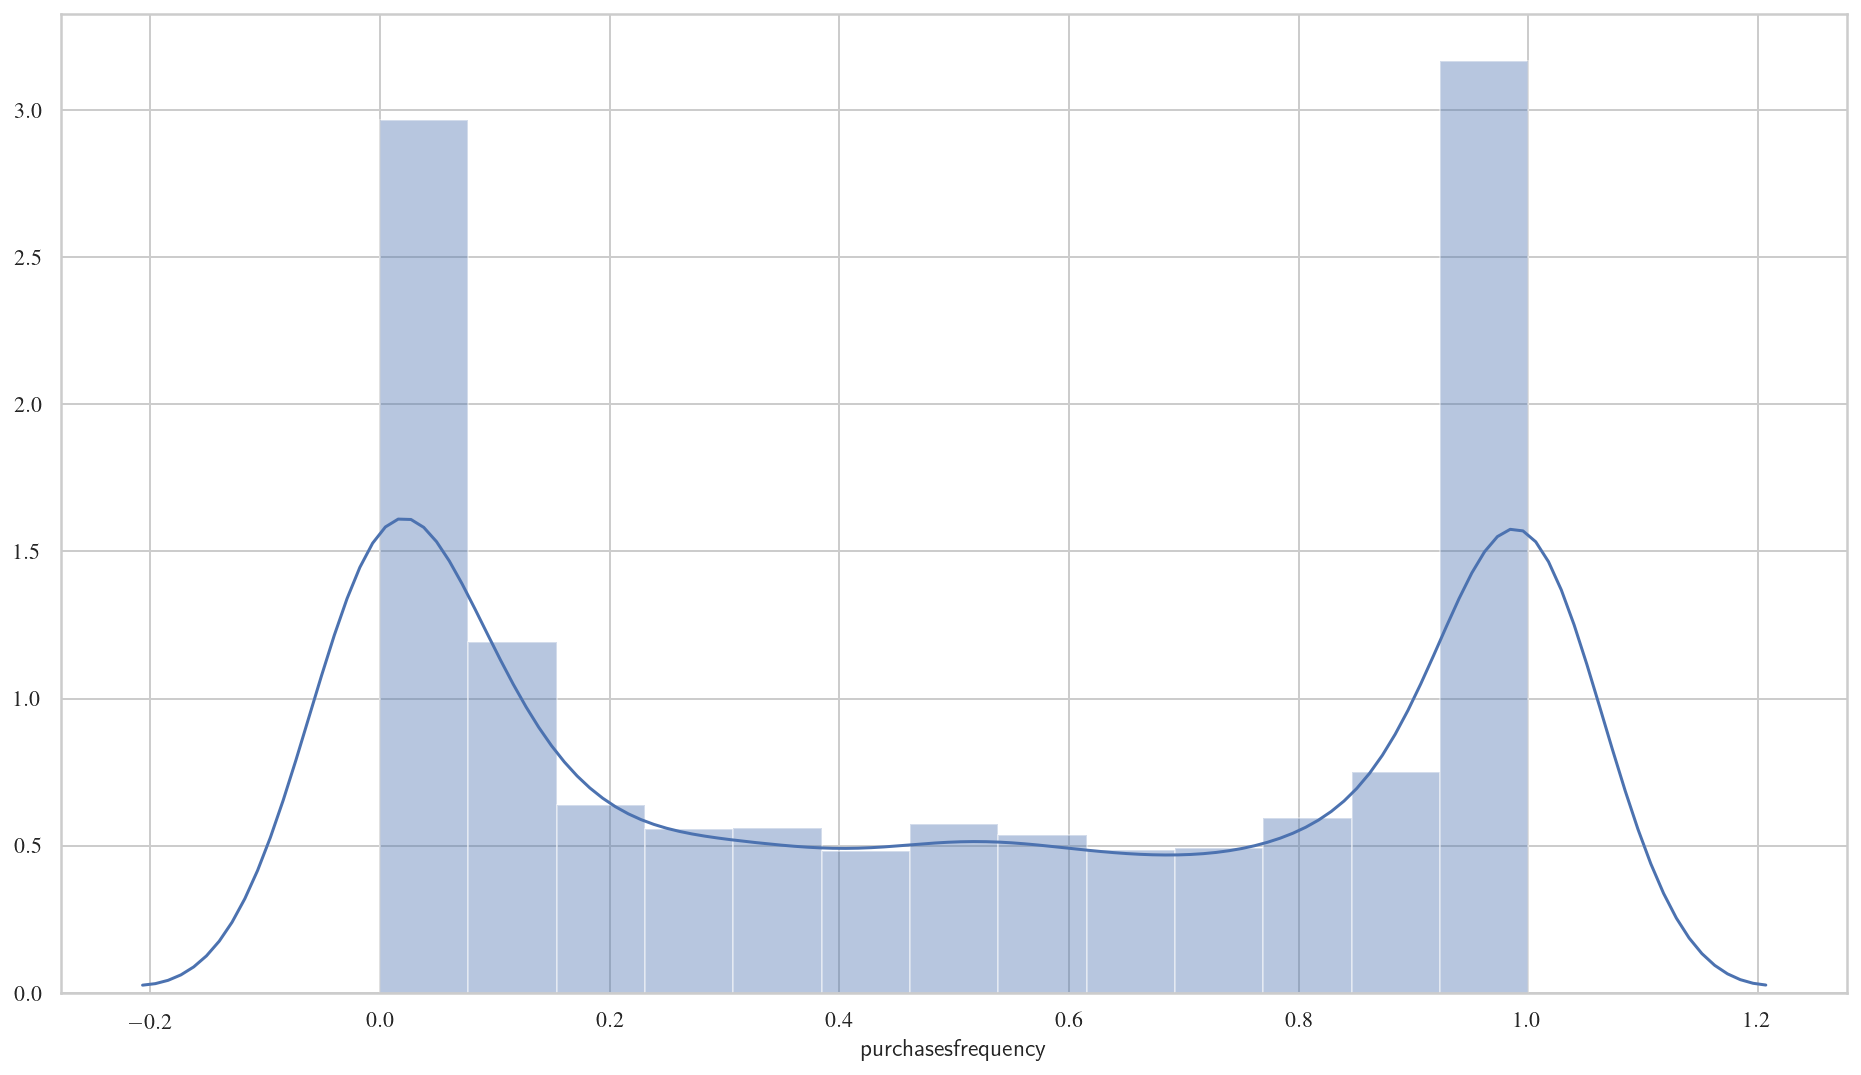

In [294]:
sns.distplot(tmp.loc[:, 'purchasesfrequency'])
plt.show()


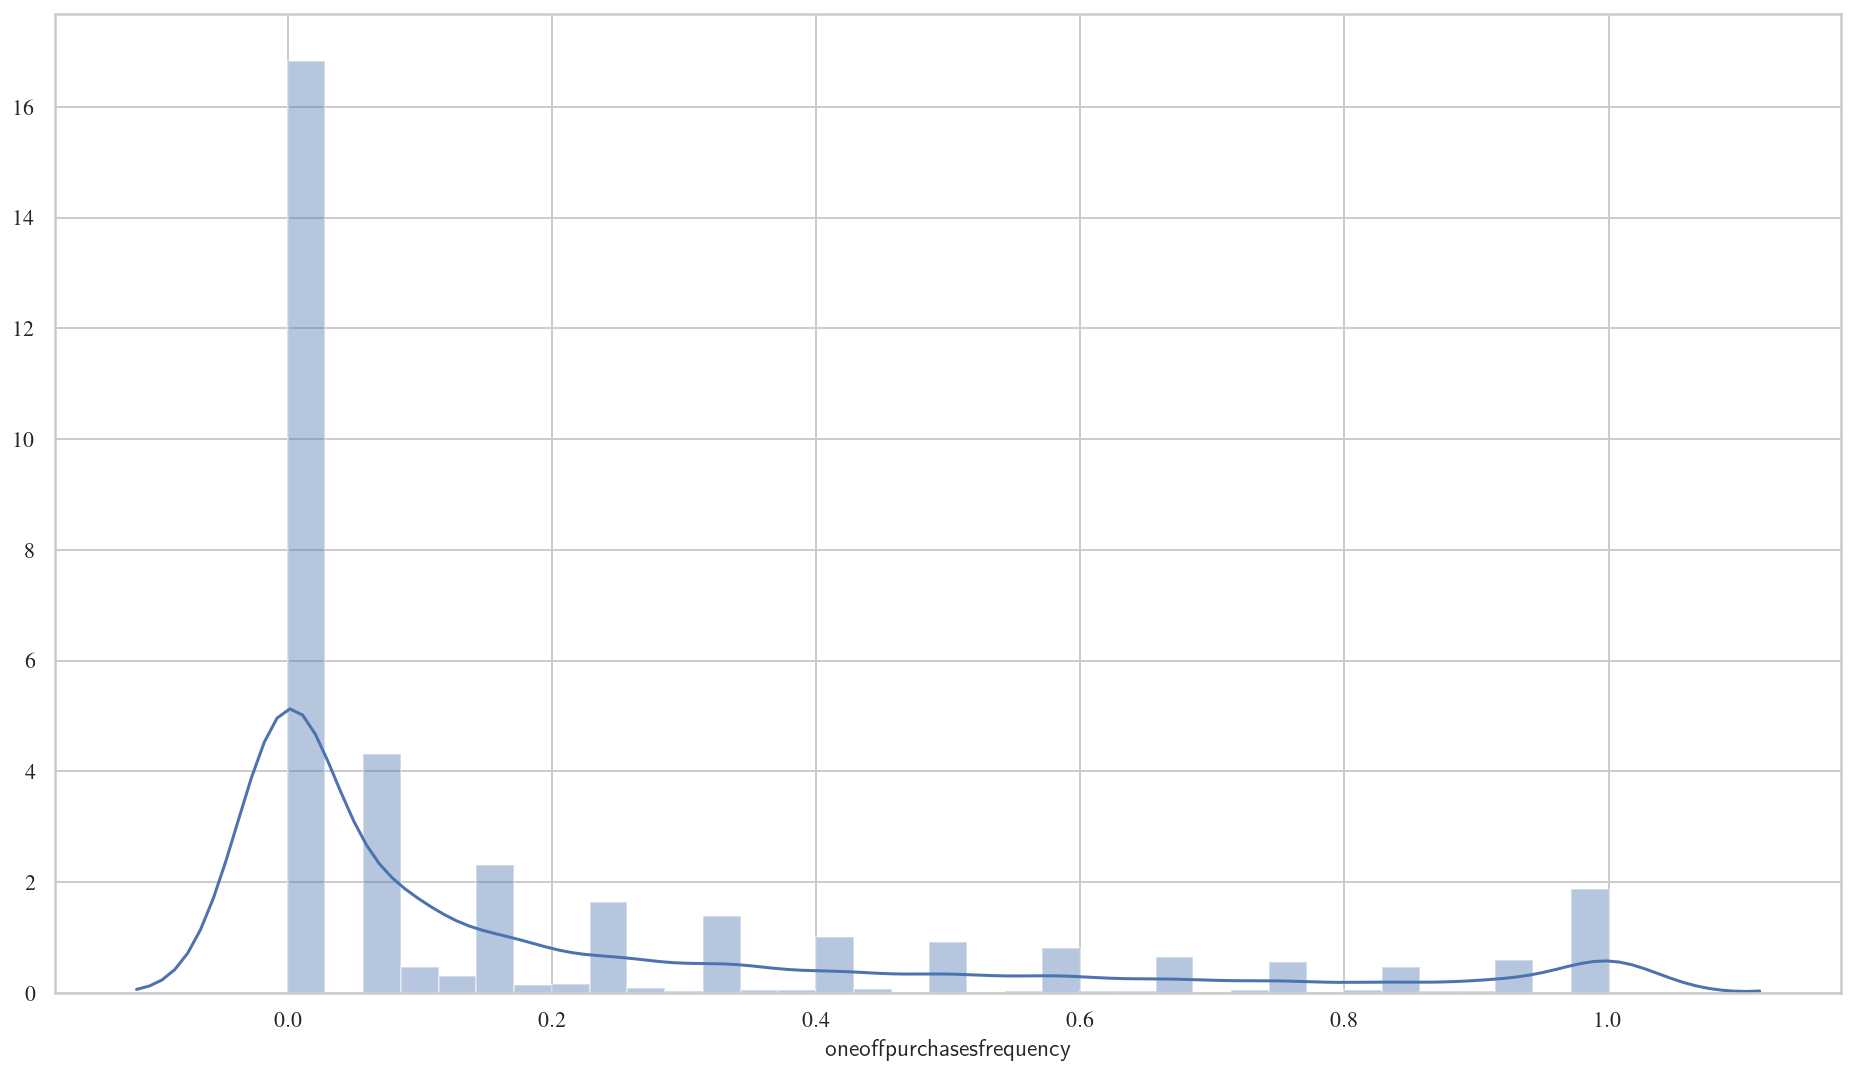

In [295]:
sns.distplot(tmp.loc[:, 'oneoffpurchasesfrequency'])
plt.show()


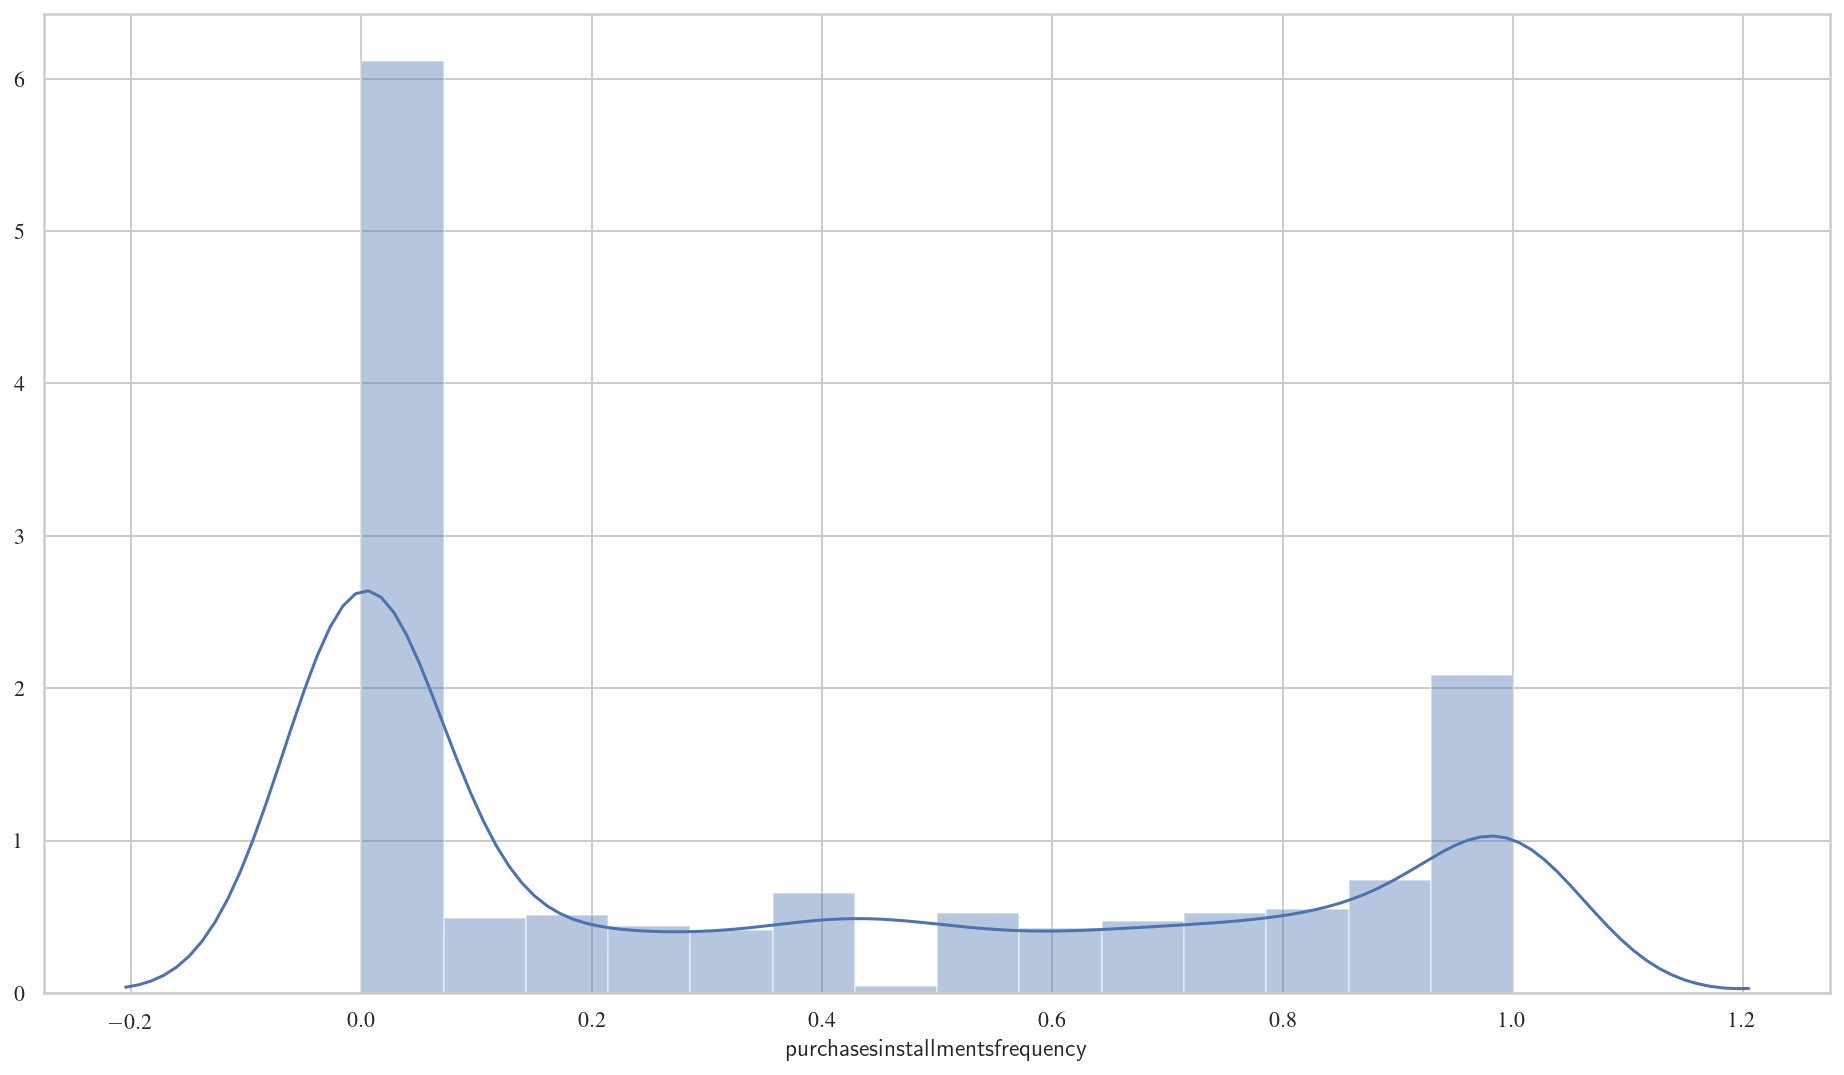

In [296]:
sns.distplot(tmp.loc[:, 'purchasesinstallmentsfrequency'])
plt.show()

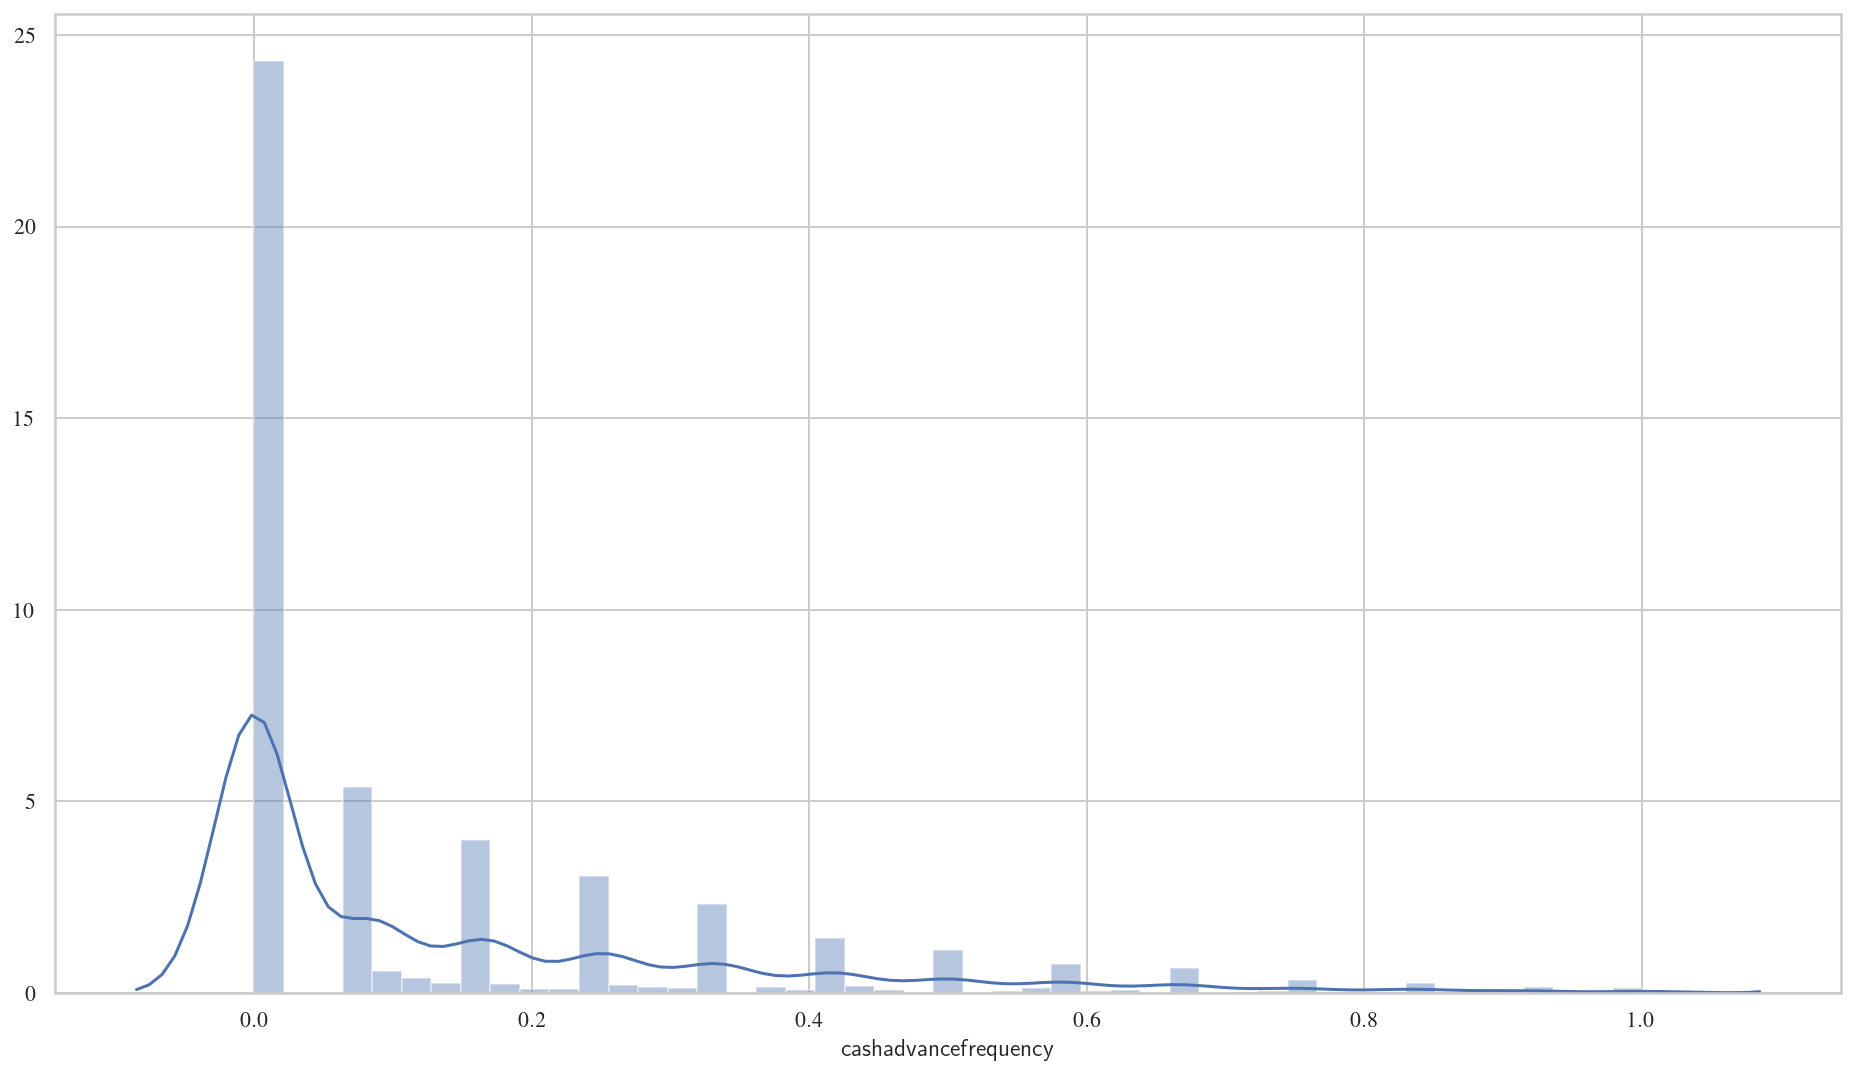

In [297]:
sns.distplot(tmp.loc[:, 'cashadvancefrequency'])
plt.show()     

In [332]:
def minMax(x):
    return pd.Series(index=['min','max'], data=[x.min(),x.max()])
df.select_dtypes(include=[np.number]).apply(minMax)

balance  balancefrequency  purchases  oneoffpurchases  \
min      0.00000               0.0       0.00             0.00   
max  19043.13856               1.0   49039.57         40761.25   

     installmentspurchases  cashadvance  purchasesfrequency  \
min                    0.0      0.00000                 0.0   
max                22500.0  47137.21176                 1.0   

     oneoffpurchasesfrequency  purchasesinstallmentsfrequency  \
min                       0.0                             0.0   
max                       1.0                             1.0   

     cashadvancefrequency     payments  
min                   0.0      0.00000  
max                   1.0  50721.48336

## impute missing data? Drop?

In [333]:
# None after reomving features we don't think are useful

## save data

In [334]:
df.to_csv('../data/interim/cc_info_useful_col.csv', index=False)

## Transform wide range data e.g., spending or balance

In [335]:
# Take log --> more normally distributed --> standarization
from sklearn import preprocessing
import numpy as np

def custom_log(row):
    return np.log10(row+0.1)


In [371]:
df['balancefrequency_log'] = df['balancefrequency'].apply(custom_log)
df['purchasesfrequency_log'] = df['purchasesfrequency'].apply(custom_log)
df['oneoffpurchasesfrequency_log'] = df['oneoffpurchasesfrequency'].apply(custom_log)
df['purchasesinstallmentsfrequency_log'] = df['purchasesinstallmentsfrequency'].apply(custom_log)
df['cashadvancefrequency_log'] = df['cashadvancefrequency'].apply(custom_log)
df['balance_log'] = df['balance'].apply(custom_log)
df['purchases_log'] = df['purchases'].apply(custom_log)
df['oneoffpurchases_log'] = df['oneoffpurchases'].apply(custom_log)
df['installmentspurchases_log'] = df['installmentspurchases'].apply(custom_log)
df['cashadvance_log'] = df['cashadvance'].apply(custom_log)
df['payments_log'] = df['payments'].apply(custom_log)

In [372]:
df.head()

custid      balance  balancefrequency  purchases  oneoffpurchases  \
0  C10001    40.900749          0.818182      95.40             0.00   
1  C10002  3202.467416          0.909091       0.00             0.00   
2  C10003  2495.148862          1.000000     773.17           773.17   
3  C10004  1666.670542          0.636364    1499.00          1499.00   
4  C10005   817.714335          1.000000      16.00            16.00   

   installmentspurchases  cashadvance  purchasesfrequency  \
0                   95.4     0.000000            0.166667   
1                    0.0  6442.945483            0.000000   
2                    0.0     0.000000            1.000000   
3                    0.0   205.788017            0.083333   
4                    0.0     0.000000            0.083333   

   oneoffpurchasesfrequency  purchasesinstallmentsfrequency  \
0                  0.000000                        0.083333   
1                  0.000000                        0.000000   
2                  1.000000                        0.000000   
3                  0.083333                        0.000000   
4                  0.083333                        0.000000   

   cashadvancefrequency     payments  balance_log  purchases_log  \
0              0.000000   201.802084     1.612792       1.980003   
1              0.250000  4103.032597     3.505498      -1.000000   
2              0.000000   622.066742     3.397114       2.888331   
3              0.083333     0.000000     3.221876       3.175831   
4              0.000000   678.334763     2.912655       1.206826   

   oneoffpurchases_log  installmentspurchases_log  cashadvance_log  \
0            -1.000000                   1.980003        -1.000000   
1            -1.000000                  -1.000000         3.809091   
2             2.888331                  -1.000000        -1.000000   
3             3.175831                  -1.000000         2.313631   
4             1.206826                  -1.000000        -1.000000   

   payments_log  balancefrequency_log  purchasesfrequency_log  \
0      2.305141             -0.037071               -0.574031   
1      3.613116              0.003930               -1.000000   
2      2.793907              0.041393                0.041393   
3     -1.000000             -0.132907               -0.736759   
4      2.831508              0.041393               -0.736759   

   oneoffpurchasesfrequency_log  purchasesinstallmentsfrequency_log  \
0                     -1.000000                           -0.736759   
1                     -1.000000                           -1.000000   
2                      0.041393                           -1.000000   
3                     -0.736759                           -1.000000   
4                     -0.736759                           -1.000000   

   cashadvancefrequency_log  
0                 -1.000000  
1                 -0.455932  
2                 -1.000000  
3                 -0.736759  
4                 -1.000000

In [377]:
# standardize 
X = df[['balance_log', 'balancefrequency_log', 'purchasesfrequency_log', 'oneoffpurchasesfrequency_log', 'purchasesinstallmentsfrequency_log',
        'cashadvancefrequency_log', 'purchases_log', 'oneoffpurchases_log', 'installmentspurchases_log', 
         'cashadvance_log', 'payments_log']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [378]:
X_scaled.describe()

balance_log  balancefrequency_log  purchasesfrequency_log  \
count  8.942000e+03          8.942000e+03            8.942000e+03   
mean   2.152128e-17          8.405296e-15           -7.290820e-16   
std    1.000056e+00          1.000056e+00            1.000056e+00   
min   -3.946796e+00         -5.627245e+00           -1.506704e+00   
25%   -5.928656e-01          1.684026e-01           -8.637019e-01   
50%    3.057141e-01          4.377300e-01            3.940390e-01   
75%    7.058779e-01          4.377300e-01            9.534706e-01   
max    1.751313e+00          4.377300e-01            1.037043e+00   

       oneoffpurchasesfrequency_log  purchasesinstallmentsfrequency_log  \
count                  8.942000e+03                        8.942000e+03   
mean                   5.315537e-15                       -9.987289e-16   
std                    1.000056e+00                        1.000056e+00   
min                   -8.662189e-01                       -1.042618e+00   
25%                   -8.662189e-01                       -1.042618e+00   
50%                   -1.369024e-01                       -8.239280e-02   
75%                    8.018072e-01                        1.052490e+00   
max                    2.018992e+00                        1.304902e+00   

       cashadvancefrequency_log  purchases_log  oneoffpurchases_log  \
count              8.942000e+03   8.942000e+03         8.942000e+03   
mean               2.198197e-15  -8.093379e-16        -6.497847e-15   
std                1.000056e+00   1.000056e+00         1.000056e+00   
min               -8.402848e-01  -1.745984e+00        -1.009018e+00   
25%               -8.402848e-01  -1.790017e-01        -1.009018e+00   
50%               -8.402848e-01   3.982210e-01         3.556079e-01   
75%                8.515775e-01   6.913312e-01         9.802877e-01   
max                2.626949e+00   1.682236e+00         1.957318e+00   

       installmentspurchases_log  cashadvance_log  payments_log  
count               8.942000e+03     8.942000e+03  8.942000e+03  
mean                8.222256e-16    -2.120660e-15  6.508872e-16  
std                 1.000056e+00     1.000056e+00  1.000056e+00  
min                -1.109769e+00    -9.448736e-01 -4.734489e+00  
25%                -1.109769e+00    -9.448736e-01 -3.265372e-01  
50%                 5.130456e-01    -9.448736e-01  1.034800e-01  
75%                 9.082435e-01     1.044826e+00  5.293549e-01  
max                 1.832129e+00     1.844986e+00  2.283122e+00

## Some plots?

In [379]:
# save data 
df.to_csv('../data/interim/cc_info_standardized_log.csv', index=False)

## put into different bins for some features? like frequent, mild, never?

In [ ]:
# add a col where it says what's your dominant usage of the CC?
# but are they mutually exclusive?

# Analysis/Modeling
 A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. 
 
 As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. Sh/e is especially interested in getting an idea of **which benefits to associate with each new card offering**. 



clustering algo:
- k-means
- GMM
- DBscan

In [380]:
X_scaled.columns

Index(['balance_log', 'balancefrequency_log', 'purchasesfrequency_log',
       'oneoffpurchasesfrequency_log', 'purchasesinstallmentsfrequency_log',
       'cashadvancefrequency_log', 'purchases_log', 'oneoffpurchases_log',
       'installmentspurchases_log', 'cashadvance_log', 'payments_log'],
      dtype='object')

k=3


(-0.1, 1)

(0, 8982)

Text(-0.05, 1308.5, '0')

Text(-0.05, 4476.0, '1')

Text(-0.05, 7658.5, '2')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature i.e. balancelog')

Text(0, 0.5, 'Feature space for the 3rd feature i.e. purchasesfrequencylog')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 3')

k=4


(-0.1, 1)

(0, 8992)

Text(-0.05, 1109.5, '0')

Text(-0.05, 3496.0, '1')

Text(-0.05, 5943.5, '2')

Text(-0.05, 8048.0, '3')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature i.e. balancelog')

Text(0, 0.5, 'Feature space for the 3rd feature i.e. purchasesfrequencylog')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 4')

k=5


(-0.1, 1)

(0, 9002)

Text(-0.05, 1093.5, '0')

Text(-0.05, 3221.5, '1')

Text(-0.05, 5126.5, '2')

Text(-0.05, 7207.0, '3')

Text(-0.05, 8709.5, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature i.e. balancelog')

Text(0, 0.5, 'Feature space for the 3rd feature i.e. purchasesfrequencylog')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 5')

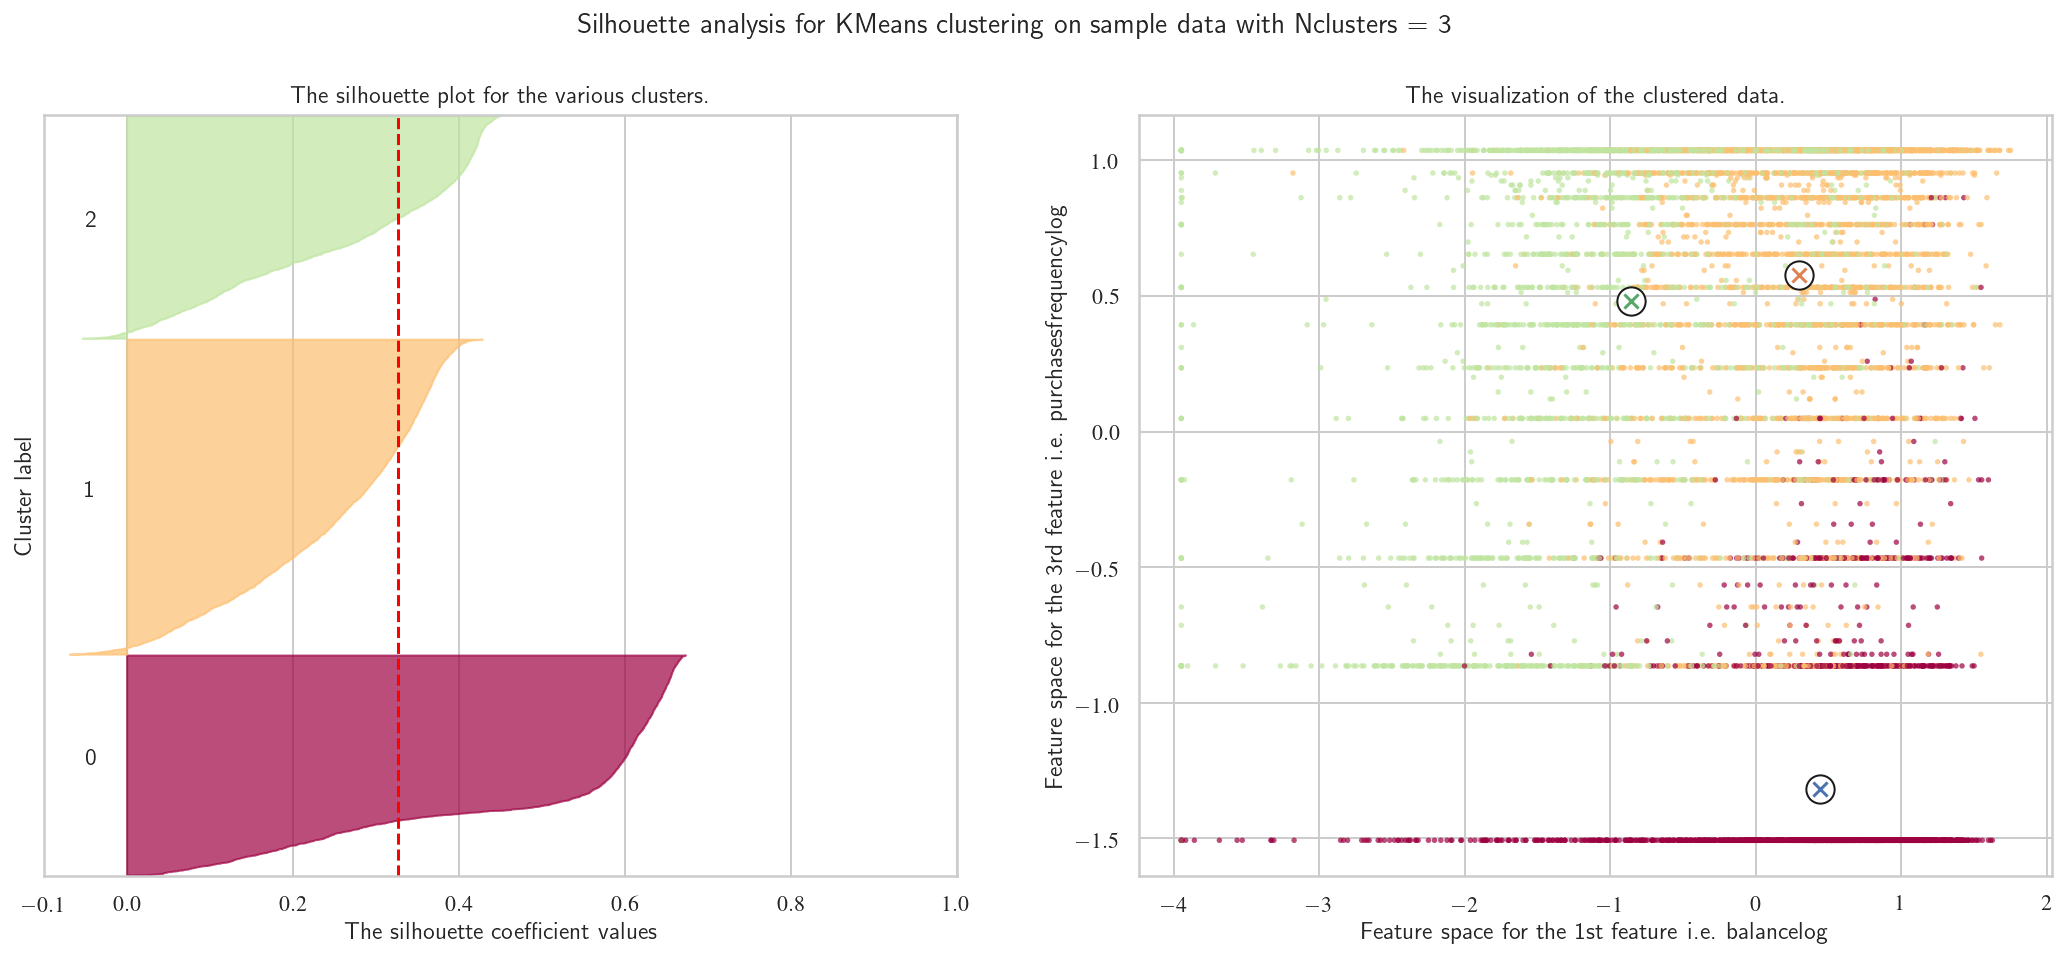

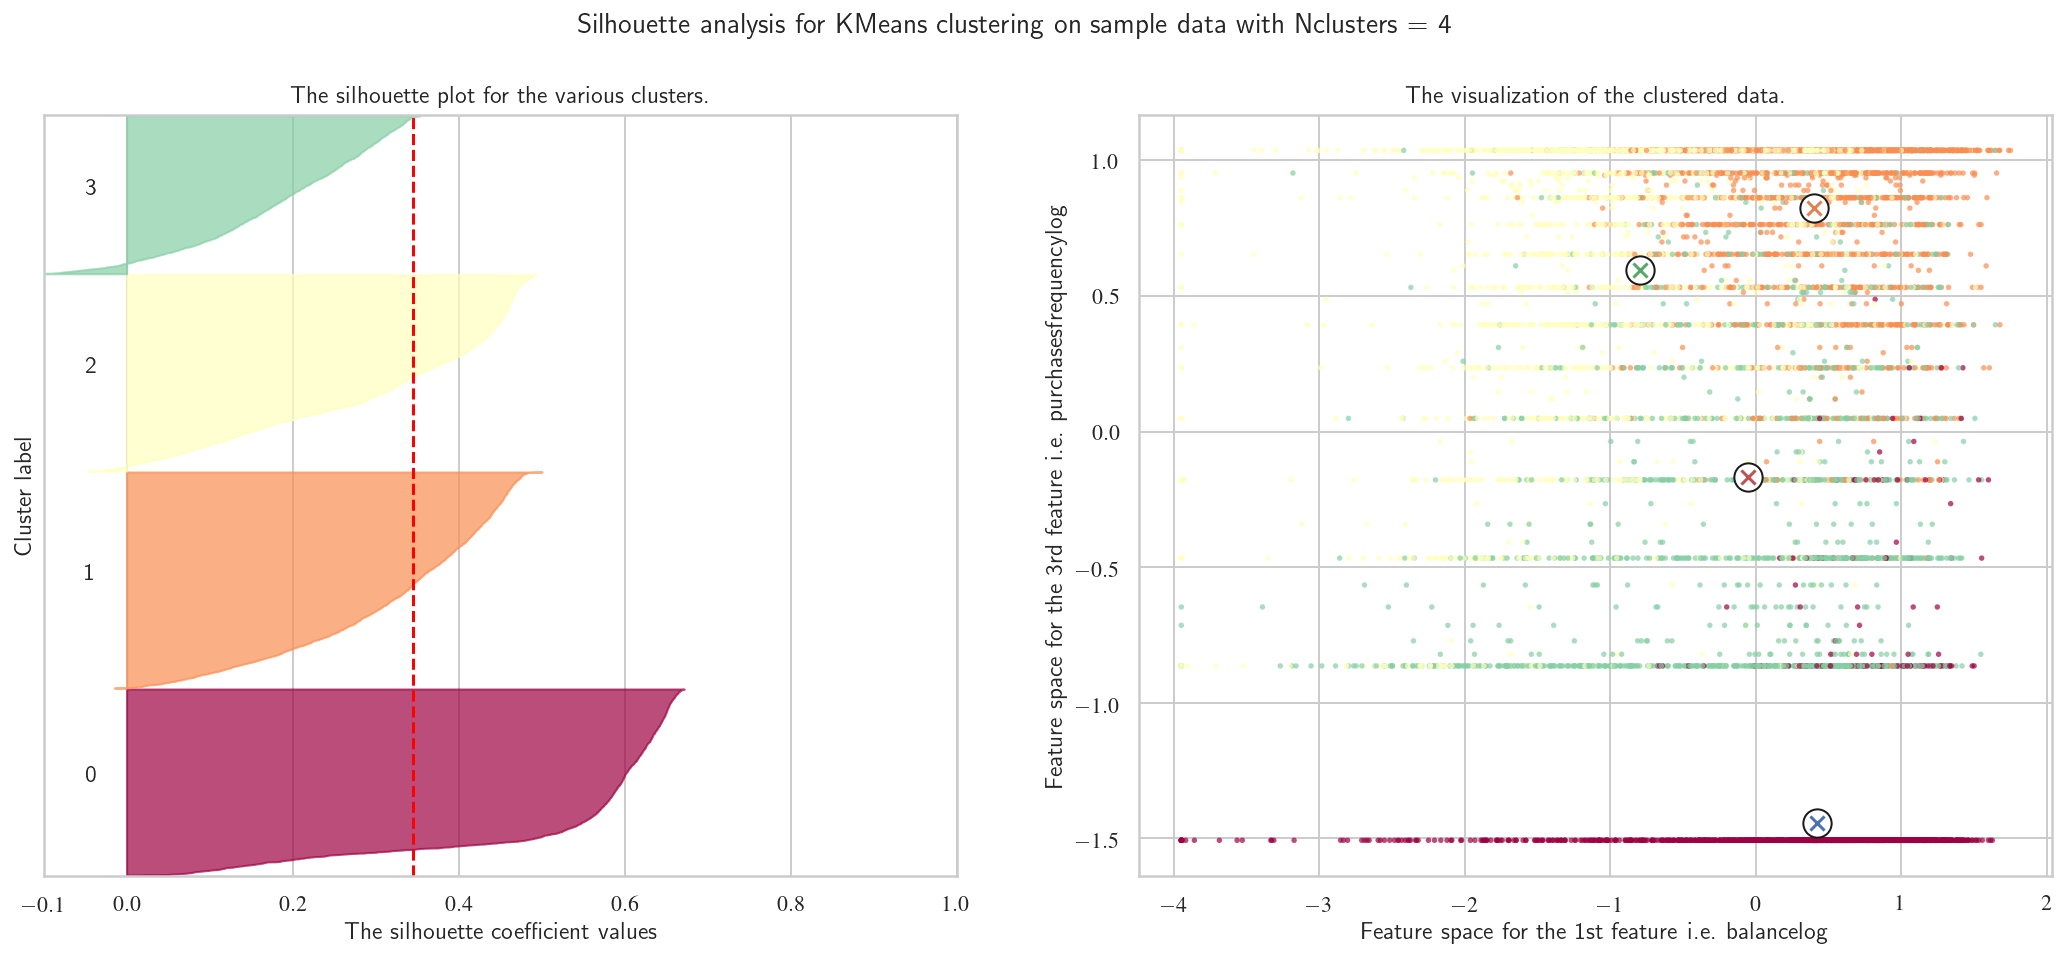

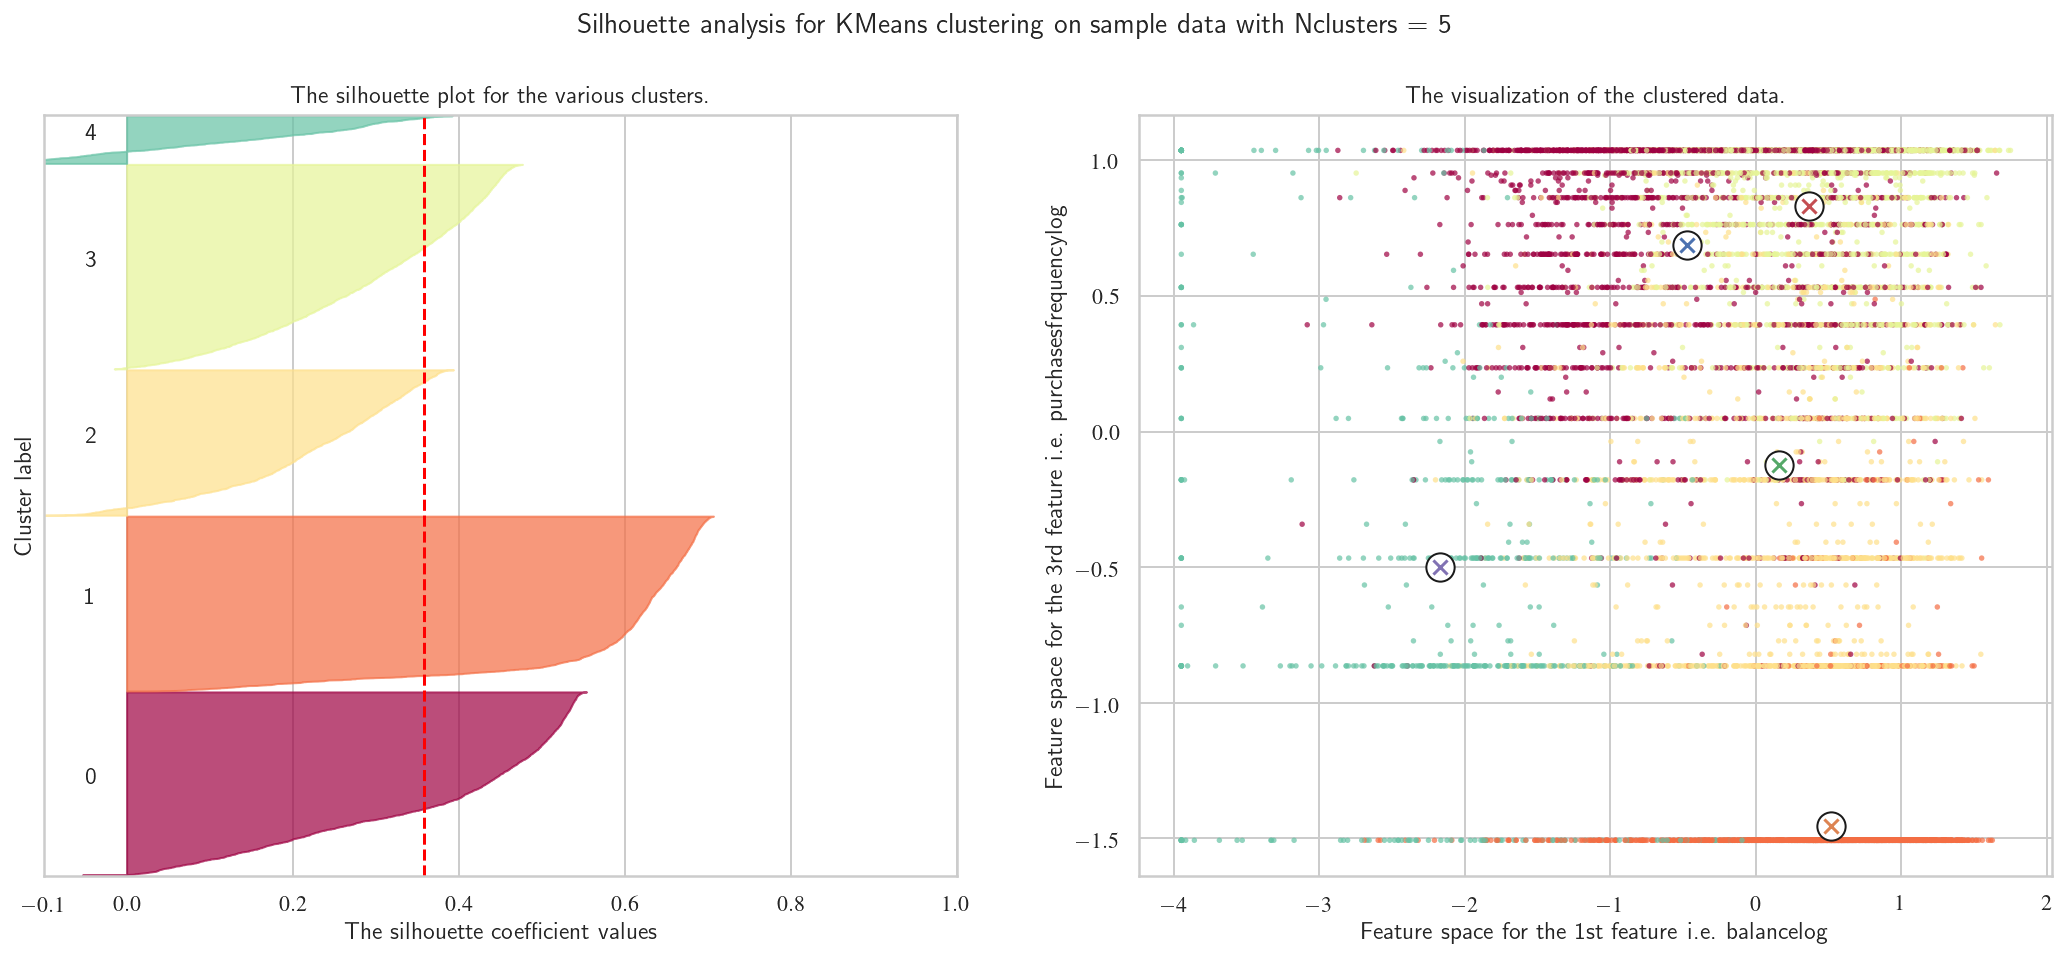

In [396]:


X = X_scaled

cluster_centers = dict()
kmeans_per_k = []

for n_clusters in range(3,6,1):
    print("k={}".format(n_clusters))    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    kmeans_per_k.append(clusterer)
    
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    
    ax2.scatter(X.iloc[:, feature1], X.iloc[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='x', alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. balancelog")
    ax2.set_ylabel("Feature space for the 3rd feature i.e. purchasesfrequencylog")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with Nclusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()
    

## Elbow curve

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Inertia')

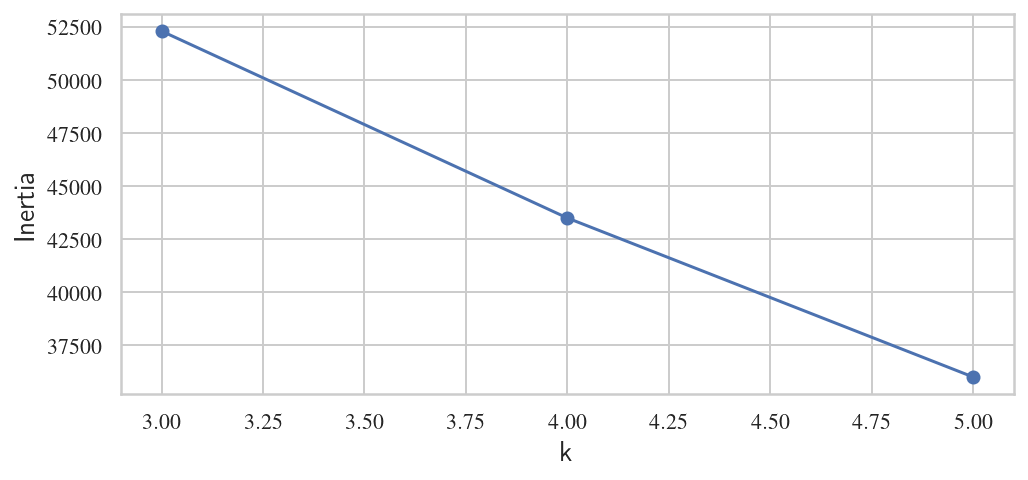

In [407]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(3, 6, 1), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[2]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.axis([2, 8.5, 0, 8300])
plt.show()

In [410]:
# find cluster centers and re-transforming back to normal fromm log and scaled version
for i in range(3,6,1):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(10**(cent_transformed), columns=X_scaled.columns))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
   balance_log  balancefrequency_log  purchasesfrequency_log  \
0  1159.458812              0.952194                0.119680   
1   857.924983              1.036342                0.714399   
2    72.967879              0.765880                0.651946   

   oneoffpurchasesfrequency_log  purchasesinstallmentsfrequency_log  \
0                      0.113971                            0.104614   
1                      0.466728                            0.366599   
2                      0.115185                            0.571090   

   cashadvancefrequency_log  purchases_log  oneoffpurchases_log  \
0                  0.337707       0.455590             0.344795   
1                  0.157822    1138.547316           640.040011   
2                  0.113758     298.089742             0.379075   

   installmentspurchases_log  cashadvance_log  payments_log  
0                   0.133621       964.862421    662.547448  
1                  33.770574         3.0

From this, I think the amount of cash-advance, or purchase, or installment purchase, or oneoffpurphase isn't as important as frequency or dominant usage using the freq features. 

In [385]:
# repeat clustering, after removing these features

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#impute-missing-data?-Drop?" data-toc-modified-id="impute-missing-data?-Drop?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>impute missing data? Drop?</a></span></li><li><span><a href="#save-data" data-toc-modified-id="save-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>save data</a></span></li><li><span><a href="#Transform-wide-range-data-e.g.,-spending-or-balance" data-toc-modified-id="Transform-wide-range-data-e.g.,-spending-or-balance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Transform wide range data e.g., spending or balance</a></span></li><li><span><a href="#Some-plots?" data-toc-modified-id="Some-plots?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Some plots?</a></span></li><li><span><a href="#put-into-different-bins-for-some-features?-like-frequent,-mild,-never?" data-toc-modified-id="put-into-different-bins-for-some-features?-like-frequent,-mild,-never?-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>put into different bins for some features? like frequent, mild, never?</a></span></li></ul></li><li><span><a href="#Analysis/Modeling" data-toc-modified-id="Analysis/Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis/Modeling</a></span><ul class="toc-item"><li><span><a href="#Elbow-curve" data-toc-modified-id="Elbow-curve-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Elbow curve</a></span></li></ul></li></ul></div>